<a href="https://colab.research.google.com/github/Eles8/World-Happiness-visualizations-predictions/blob/main/world_happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install required packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import matplotlib.pyplot as plt


In [ ]:
!pip install plotly-express 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 2. Load the dataset

In [ ]:
data=pd.read_csv('world-happiness-report-2015-2022-cleaned.csv')
data.head()

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [ ]:
data.tail()

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
1224,141,142,Botswana*,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022
1225,142,143,Rwanda*,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022
1226,143,144,Zimbabwe,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022
1227,144,145,Lebanon,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022
1228,145,146,Afghanistan,Southern Asia,"2,404","0,758","0,000","0,289","0,000","0,005","0,089",2022


# 3. EDA

In [ ]:
data.isna().sum()

Unnamed: 0                       0
Happiness Rank                   0
Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family (Social Support)          0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     1229 non-null   int64 
 1   Happiness Rank                 1229 non-null   int64 
 2   Country                        1229 non-null   object
 3   Region                         1229 non-null   object
 4   Happiness Score                1229 non-null   object
 5   Economy (GDP per Capita)       1229 non-null   object
 6   Family (Social Support)        1229 non-null   object
 7   Health (Life Expectancy)       1229 non-null   object
 8   Freedom                        1229 non-null   object
 9   Trust (Government Corruption)  1229 non-null   object
 10  Generosity                     1229 non-null   object
 11  Year                           1229 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 115.3+ KB


In [ ]:
# The Unnamed:0 column is practically the Happiness Rank, so we can delete it.

# data.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.describe(include='all')

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,1229.000000,1229.000000,1229,1229,1229,1229,1229,1229,1229,1229,1229,1229.000000
unique,NaN,NaN,195,17,1131,1150,1133,1080,1053,952,979,NaN
top,NaN,NaN,Switzerland,Sub-Saharan Africa,5.813,0.0,0.0,0.0,0.0,0.064,0.153,NaN
freq,NaN,NaN,8,283,3,7,7,7,7,9,7,NaN
mean,76.471928,77.468674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.447518
std,44.474367,44.474181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.283610
min,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000
25%,38.000000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000
50%,76.000000,77.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000
75%,115.000000,116.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000


**129 countries participated in the research from 17 unique regions.**

In [ ]:
data.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia', '-',
       'North America and ANZ', 'Middle East and North Africa',
       'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'South Asia'], dtype=object)

We will see some of the regions and what countries they include.

In [ ]:
data[data['Region']=='-']

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
347,32,33,Taiwan Province of China,-,6.42199993133545,1.43362653255463,1.38456535339355,0.793984234333038,0.361466586589813,0.0638292357325554,0.258360475301743,2017
364,49,50,Belize,-,5.95599985122681,0.907975316047668,1.08141779899597,0.450191766023636,0.547509372234344,0.0965810716152191,0.240015640854836,2017
385,70,71,"Hong Kong S.A.R., China",-,5.47200012207031,1.55167484283447,1.26279091835022,0.943062424659729,0.490968644618988,0.293933749198914,0.374465793371201,2017
407,92,93,Somalia,-,5.15100002288818,0.0226431842893362,0.721151351928711,0.113989137113094,0.602126955986023,0.282410323619843,0.291631311178207,2017
425,110,111,Namibia,-,4.57399988174438,0.964434325695038,1.0984708070755,0.33861181139946,0.520303547382355,0.0931469723582268,0.0771337449550629,2017
461,146,147,South Sudan,-,3.59100008010864,0.39724862575531,0.601323127746582,0.163486003875732,0.147062435746193,0.116793513298035,0.285670816898346,2017
506,37,38,Trinidad & Tobago,-,6.192,1.223,1.492,0.564,0.575,0.019,0.171,2018
517,48,49,Belize,-,5.956,0.807,1.101,0.474,0.593,0.089,0.183,2018
526,57,58,Northern Cyprus,-,5.835,1.229,1.211,0.909,0.495,0.154,0.179,2018
566,97,98,Somalia,-,4.982,0.0,0.712,0.115,0.674,0.282,0.238,2018


In [ ]:
data[data['Region']=='North America and ANZ']

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
788,7,8,New Zealand,North America and ANZ,7.299600124,1.242317915,1.48721838,1.008138299,0.646789908,0.461268276,0.325726211,2020
791,10,11,Canada,North America and ANZ,7.23210001,1.301647663,1.435391903,1.022501945,0.644028127,0.351701856,0.28152892,2020
792,11,12,Australia,North America and ANZ,7.222799778,1.310396433,1.477146268,1.022607684,0.621877193,0.335996419,0.324973613,2020
798,17,18,United States,North America and ANZ,6.939599991,1.37398684,1.404786706,0.831618011,0.534608245,0.152284741,0.298143059,2020
942,8,9,New Zealand,North America and ANZ,7.277,1.4,1.094,0.785,0.665,0.445,0.276,2021
944,10,11,Australia,North America and ANZ,7.183,1.453,1.076,0.801,0.647,0.317,0.291,2021
947,13,14,Canada,North America and ANZ,7.103,1.447,1.044,0.798,0.648,0.335,0.246,2021
952,18,19,United States,North America and ANZ,6.951,1.533,1.03,0.621,0.554,0.154,0.252,2021


In [ ]:
data[data['Region']=='Australia and New Zealand']

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
8,8,9,New Zealand,Australia and New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,9,10,Australia,Australia and New Zealand,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015
165,7,8,New Zealand,Australia and New Zealand,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2016
166,8,9,Australia,Australia and New Zealand,7.313,1.44443,1.10476,0.8512,0.56837,0.32331,0.47407,2016
322,7,8,New Zealand,Australia and New Zealand,7.31400012969971,1.40570604801178,1.54819512367249,0.816759705543518,0.614062130451202,0.382816702127457,0.500005125999451,2017
324,9,10,Australia,Australia and New Zealand,7.28399991989136,1.484414935112,1.51004195213318,0.84388679265976,0.601607382297516,0.301183730363846,0.477699249982834,2017
477,7,8,New Zealand,Australia and New Zealand,7.324,1.268,1.601,0.876,0.669,0.389,0.365,2018
479,9,10,Australia,Australia and New Zealand,7.272,1.34,1.573,0.91,0.647,0.302,0.361,2018
632,7,8,New Zealand,Australia and New Zealand,7.307,1.303,1.557,1.026,0.585,0.38,0.33,2019
635,10,11,Australia,Australia and New Zealand,7.228,1.372,1.548,1.036,0.557,0.29,0.332,2019



**Let's tidy up the Regions and continents.**



In [ ]:
data.loc[data.Country == "Armenia","Region"] = "Asia"
data.loc[data.Country == "Azerbaijan","Region"] = "Asia"
data.loc[data.Country == "Belarus","Region"] = "Europe"
data.loc[data.Country == "Georgia","Region"] = "Europe"
data.loc[data.Country == "Kazakhstan","Region"] = "Asia"
data.loc[data.Country == "Kyrgyzstan","Region"] = "Asia"
data.loc[data.Country == "Moldova","Region"] = "Europe"
data.loc[data.Country == "Russia","Region"] = "Asia"
data.loc[data.Country == "Tajikistan","Region"] = "Asia"
data.loc[data.Country == "Turkmenistan","Region"] = "Asia"
data.loc[data.Country == "Ukraine","Region"] = "Europe"
data.loc[data.Country == "Uzbekistan","Region"] = "Asia"

In [ ]:
data.Region.replace("Central and Eastern Europe","Europe",inplace=True)
data.Region.replace("East Asia","Asia",inplace=True)
data.Region.replace("Eastern Asia","Asia",inplace=True)
data.Region.replace("Middle East","Asia",inplace=True)
data.Region.replace("South Asia","Asia",inplace=True)
data.Region.replace("Southern Asia","Asia",inplace=True)
data.Region.replace("Southeast Asia","Asia",inplace=True)
data.Region.replace("Southeastern Asia","Asia",inplace=True)
data.Region.replace("Western Europe","Europe",inplace=True)
data.Region.replace("North America","America",inplace=True)
data.Region.replace("Latin America and Caribbean","America",inplace=True)
data.Region.replace("Sub-Saharan Africa","Africa",inplace=True)

In [ ]:
data.loc[data.Country == "Australia","Region"] = "Australia"
data.loc[data.Country == "Canada","Region"] = "America"
data.loc[data.Country == "New Zealand","Region"] = "New Zealand"
data.loc[data.Country == "United States","Region"] = "America"

In [ ]:
data.loc[data.Country == "Algeria","Region"] = "Africa"
data.loc[data.Country == "Bahrain","Region"] = "Asia"
data.loc[data.Country == "Palestinian Territories","Region"] = "Asia"
data.loc[data.Country == "Egypt","Region"] = "Africa"
data.loc[data.Country == "Morocco","Region"] = "Africa"
data.loc[data.Country == "Iraq","Region"] = "Asia"
data.loc[data.Country == "Iran","Region"] = "Asia"
data.loc[data.Country == "Israel","Region"] = "Asia"
data.loc[data.Country == "Jordan","Region"] = "Asia"
data.loc[data.Country == "Kuwait","Region"] = "Asia"
data.loc[data.Country == "Lebanon","Region"] = "Asia"
data.loc[data.Country == "Libya","Region"] = "Africa"
data.loc[data.Country == "Africa","Region"] = "Africa"
data.loc[data.Country == "Oman","Region"] = "Asia"
data.loc[data.Country == "Qatar","Region"] = "Asia"
data.loc[data.Country == "Saudi Arabia","Region"] = "Asia"
data.loc[data.Country == "Syria","Region"] = "Asia"
data.loc[data.Country == "Tunisia","Region"] = "Africa"
data.loc[data.Country == "Turkey","Region"] = "Asia"
data.loc[data.Country == "United Arab Emirates","Region"] = "Asia"
data.loc[data.Country == "Yemen","Region"] = "Asia"

In [ ]:
data.loc[data.Country == "Somalia","Region"] = "Africa"
data.loc[data.Country == "Namibia","Region"] = "Africa"
data.loc[data.Country == "Gambia","Region"] = "Africa"
data.loc[data.Country == "South Sudan","Region"] = "Africa"
data.loc[data.Country == "Taiwan Province of China","Region"] = "Asia"
data.loc[data.Country == "Czechia","Region"] = "Europe"
data.loc[data.Country == "Northern Cyprus","Region"] = "Europe"

In [ ]:
data.iloc[347,3] = "Asia"
data.iloc[364,3] = "America"
data.iloc[385,3] = "Asia"
data.iloc[407,3] = "Africa"
data.iloc[425,3] = "Africa"
data.iloc[461,3] = "Africa"
data.iloc[506,3] = "America"
data.iloc[517,3] = "America"
data.iloc[566,3] = "Africa"
data.iloc[587,3] = "Africa"
data.iloc[622,3] = "Africa"
data.iloc[663,3] = "America"
data.iloc[708,3] = "Europe"
data.iloc[1088,3] = "Europe"
data.iloc[1121,3] = "America"
data.iloc[1132,3] = "Asia"
data.iloc[1147,3] = "Europe"
data.iloc[1160,3] = "Asia"
data.iloc[1163,3] = "Asia"
data.iloc[1168,3] = "Africa"
data.iloc[1171,3] = "Europe"
data.iloc[1174,3] = "Asia"
data.iloc[1175,3] = "Africa"
data.iloc[1179,3] = "Africa"
data.iloc[1181,3] = "Africa"
data.iloc[1186,3] = "Africa"
data.iloc[1198,3] = "Africa"
data.iloc[1204,3] = "Asia"
data.iloc[1206,3] = "Africa"
data.iloc[1207,3] = "Africa"
data.iloc[1210,3] = "Africa"
data.iloc[1212,3] = "Africa"
data.iloc[1214,3] = "Asia"
data.iloc[1215,3] = "Africa"
data.iloc[1223,3] = "Africa"
data.iloc[1224,3] = "Africa"
data.iloc[1225,3] = "Africa"
data.iloc[1161,3] = "Africa"

In [ ]:
data.head(10)

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,5,6,Finland,Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,6,7,Netherlands,Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.4761,2015
7,7,8,Sweden,Europe,7.364,1.33171,1.28907,0.91087,0.6598,0.43844,0.36262,2015
8,8,9,New Zealand,New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,9,10,Australia,Australia,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015


In [ ]:
data.tail(15)

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
1214,131,132,Yemen*,Asia,"4,197","0,691","1,043","0,384","0,330","0,098","0,090",2022
1215,132,133,Mauritania*,Africa,"4,153","1,100","0,865","0,450","0,304","0,138","0,088",2022
1216,133,134,Jordan,Asia,"4,152","1,324","0,724","0,675","0,476","0,200","0,058",2022
1217,134,135,Togo,Africa,"4,112","0,771","0,322","0,360","0,292","0,132","0,174",2022
1218,135,136,India,Asia,"3,777","1,167","0,376","0,471","0,647","0,123","0,198",2022
1219,136,137,Zambia,Africa,"3,760","0,930","0,577","0,306","0,525","0,083","0,203",2022
1220,137,138,Malawi,Africa,"3,750","0,648","0,279","0,388","0,477","0,157","0,140",2022
1221,138,139,Tanzania,Africa,"3,702","0,848","0,597","0,425","0,578","0,270","0,248",2022
1222,139,140,Sierra Leone,Africa,"3,574","0,686","0,416","0,273","0,387","0,055","0,202",2022
1223,140,141,Lesotho*,Africa,"3,512","0,839","0,848","0,000","0,419","0,018","0,076",2022


In [ ]:
data2=data.copy()


We need to get rid of the asterisks.

In [ ]:
data['Country']=data['Country'].str.replace('*','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
data.tail(15)

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
1214,131,132,Yemen,Asia,"4,197","0,691","1,043","0,384","0,330","0,098","0,090",2022
1215,132,133,Mauritania,Africa,"4,153","1,100","0,865","0,450","0,304","0,138","0,088",2022
1216,133,134,Jordan,Asia,"4,152","1,324","0,724","0,675","0,476","0,200","0,058",2022
1217,134,135,Togo,Africa,"4,112","0,771","0,322","0,360","0,292","0,132","0,174",2022
1218,135,136,India,Asia,"3,777","1,167","0,376","0,471","0,647","0,123","0,198",2022
1219,136,137,Zambia,Africa,"3,760","0,930","0,577","0,306","0,525","0,083","0,203",2022
1220,137,138,Malawi,Africa,"3,750","0,648","0,279","0,388","0,477","0,157","0,140",2022
1221,138,139,Tanzania,Africa,"3,702","0,848","0,597","0,425","0,578","0,270","0,248",2022
1222,139,140,Sierra Leone,Africa,"3,574","0,686","0,416","0,273","0,387","0,055","0,202",2022
1223,140,141,Lesotho,Africa,"3,512","0,839","0,848","0,000","0,419","0,018","0,076",2022


In [ ]:
data.drop(columns='Unnamed: 0', inplace=True)


In [ ]:
data.head()

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,1,Switzerland,Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,Iceland,Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,3,Denmark,Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,Norway,Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,Canada,America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [ ]:
# Let's format the indicating columns into float instead of object type that they are now.

list= ['Happiness Score','Economy (GDP per Capita)', 'Family (Social Support)', 'Health (Life Expectancy)', 'Freedom', 
       'Trust (Government Corruption)', 'Generosity']

for indicator in list:
    current_list = data[indicator]
    data[indicator] = [x.replace(',','.') for x in current_list]
    data[indicator] = data[indicator].astype(float)

In [ ]:
data.head()

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,1,Switzerland,Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,Iceland,Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,3,Denmark,Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,Norway,Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,Canada,America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 1229 non-null   int64  
 1   Country                        1229 non-null   object 
 2   Region                         1229 non-null   object 
 3   Happiness Score                1229 non-null   float64
 4   Economy (GDP per Capita)       1229 non-null   float64
 5   Family (Social Support)        1229 non-null   float64
 6   Health (Life Expectancy)       1229 non-null   float64
 7   Freedom                        1229 non-null   float64
 8   Trust (Government Corruption)  1229 non-null   float64
 9   Generosity                     1229 non-null   float64
 10  Year                           1229 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 105.7+ KB


In [ ]:
data.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,77.468674,5.428998,0.975343,1.033193,0.608082,0.440960,0.130756,0.201595,2018.447518
std,44.474181,1.115155,0.434249,0.329578,0.241340,0.154412,0.110818,0.115568,2.283610
min,1.000000,2.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,39.000000,4.584000,0.668000,0.828000,0.439000,0.345000,0.056000,0.118000,2016.000000
50%,77.000000,5.410000,1.012160,1.069336,0.639333,0.459000,0.096000,0.187000,2018.000000
75%,116.000000,6.223000,1.295843,1.273850,0.790810,0.559000,0.164000,0.258538,2020.000000
max,158.000000,7.842000,2.209000,1.644000,1.141000,0.740000,0.587000,0.838075,2022.000000


In [ ]:
happy= data.sort_values(by='Happiness Rank', ascending=True).head(15)
happy

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,1,Switzerland,Europe,7.5870,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015
470,1,Finland,Europe,7.6320,1.305000,1.592000,0.874000,0.681000,0.393000,0.202000,2018
781,1,Finland,Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.477857,0.159670,2020
315,1,Norway,Europe,7.5370,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2017
934,1,Finland,Europe,7.8420,1.446000,1.106000,0.741000,0.691000,0.481000,0.124000,2021
158,1,Denmark,Europe,7.5260,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2016
1083,1,Finland,Europe,7.8210,1.892000,1.258000,0.775000,0.736000,0.534000,0.109000,2022
625,1,Finland,Europe,7.7690,1.340000,1.587000,0.986000,0.596000,0.393000,0.153000,2019
935,2,Denmark,Europe,7.6200,1.502000,1.108000,0.763000,0.686000,0.485000,0.208000,2021
1,2,Iceland,Europe,7.5610,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2015


**We observe that mainly the Nortern European Countries such as Finland, Denmark, Norway appear first on the 'Happiness Rank' list for consecutive years.**

In [ ]:
unhappy=data.sort_values(by='Happiness Rank', ascending=False).head(15)
unhappy

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
157,158,Togo,Africa,2.839,0.20868,0.13995,0.284430,0.364530,0.107310,0.166810,2015
156,157,Burundi,Africa,2.905,0.01530,0.41587,0.223960,0.118500,0.100620,0.197270,2015
314,157,Burundi,Africa,2.905,0.06831,0.23442,0.157470,0.043200,0.094190,0.202900,2016
780,156,South Sudan,Africa,2.853,0.30600,0.57500,0.295000,0.010000,0.091000,0.202000,2019
155,156,Syria,Asia,3.006,0.66320,0.47489,0.721930,0.156840,0.189060,0.471790,2015
624,156,Burundi,Africa,2.905,0.09100,0.62700,0.145000,0.065000,0.076000,0.149000,2018
313,156,Syria,Asia,3.069,0.74719,0.14866,0.629940,0.069120,0.172330,0.483970,2016
312,155,Togo,Africa,3.303,0.28123,0.00000,0.248110,0.346780,0.115870,0.175170,2016
154,155,Benin,Africa,3.340,0.28665,0.35386,0.319100,0.484500,0.080100,0.182600,2015
469,155,Central African Republic,Africa,2.693,0.00000,0.00000,0.018773,0.270842,0.056565,0.280876,2017


**On the other hand, poorer countries from Africa and S.Asia such as Afghanistan, appear last on the 'Happiness Rank' list.**

In [ ]:
data.corr().sort_values(by='Happiness Score', ascending=False)

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
Happiness Score,-0.988834,1.000000,0.742438,0.629771,0.727904,0.566554,0.407241,0.091440,0.057834
Economy (GDP per Capita),-0.747181,0.742438,1.000000,0.493423,0.705941,0.408341,0.329331,-0.117928,0.228191
Health (Life Expectancy),-0.732476,0.727904,0.705941,0.622583,1.000000,0.335920,0.274839,-0.010325,0.009240
Family (Social Support),-0.629785,0.629771,0.493423,1.000000,0.622583,0.331743,0.127802,0.007587,-0.049405
Freedom,-0.551753,0.566554,0.408341,0.331743,0.335920,1.000000,0.441157,0.191387,0.236795
Trust (Government Corruption),-0.383145,0.407241,0.329331,0.127802,0.274839,0.441157,1.000000,0.244566,0.018852
Generosity,-0.075095,0.091440,-0.117928,0.007587,-0.010325,0.191387,0.244566,1.000000,-0.263420
Year,-0.039455,0.057834,0.228191,-0.049405,0.009240,0.236795,0.018852,-0.263420,1.000000
Happiness Rank,1.000000,-0.988834,-0.747181,-0.629785,-0.732476,-0.551753,-0.383145,-0.075095,-0.039455


 **Looking at the 'Happiness Score' column, the highest correlation values (close to 1) appear for the rows of 'Economy', 'Family' and 'Health'. It means that they have the greatest impact on how happy we are based on these factors.**

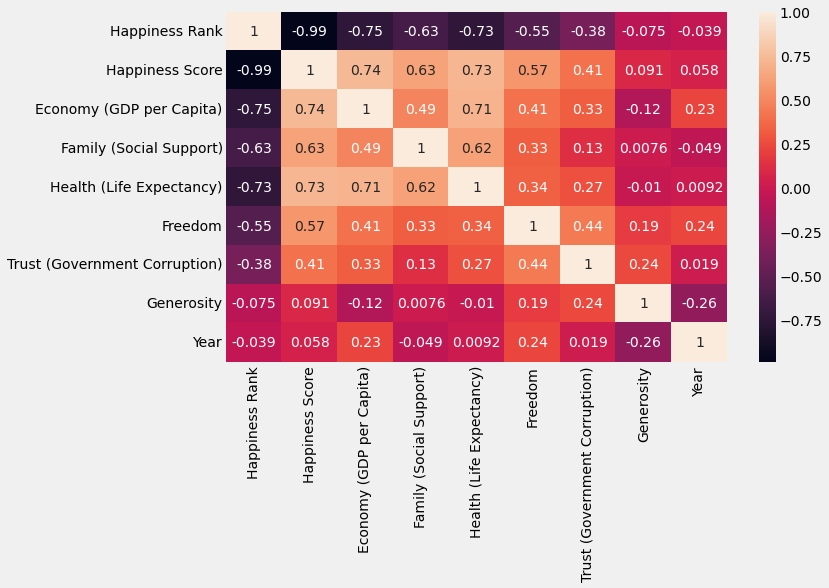

In [ ]:
sns.heatmap(data.corr(), annot=True)

# 4. Visualizations

In [1]:
plt.figure(figsize=(5,5))
countries = np.unique(data.Country.values)
score = []
for country in np.unique(countries):
    score.append(np.median(data[data.Country == country]["Happiness Score"].values))
score, countries = zip(*sorted(zip(score, countries),reverse=True))
plt.barh(countries[:10],score[:10])
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.title("Top 10 Happy Countries")
plt.show()

NameError: ignored

In [ ]:
plt.figure(figsize=(5,5))
countries = np.unique(data.Country.values)
score = []
for country in np.unique(countries):
    score.append(np.median(data[data.Country == country]["Happiness Score"].values))
score, countries = zip(*sorted(zip(score, countries),reverse=False))
plt.barh(countries[:10],score[:10])
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.title("Top 10 Least Happy Countries")
plt.show()

In [ ]:
regions=data.Region.unique()
regions

In [ ]:
px.histogram(data, x = 'Happiness Score'
             ,facet_row = 'Year',  facet_col = 'Region', height=1000
            
             )

In [ ]:
px.histogram(data, x='Happiness Score',
  color=data['Region'],
  facet_col=data["Region"],
  facet_col_wrap=6)

As we can see, in Africa and Asia most of the happines scores observed, are below 6, and reach below 4 with many counts. While in Europe and America, most of the observed scores are around 6 and above.

In [ ]:
avg_per_region= data.groupby('Region')['Happiness Score'].mean().reset_index()
px.bar(avg_per_region.sort_values(by='Happiness Score', ascending=False), x='Region', y='Happiness Score', color='Region',title='Average Happiness score per Region')

## **Europe**

In [ ]:
europe= data[data['Region']=='Europe']
europe

In [ ]:
europe.sort_values(by='Happiness Score', ascending=False)

In [ ]:
europe['Happiness Score'].mean()

In [ ]:
df2 = europe.groupby(['Country']).mean().sort_values('Happiness Score', ascending=False).reset_index()

In [ ]:
px.bar(df2[:10], x="Country", y = "Happiness Score", color = "Country", title = "10 Happiest Countries in Europe (avg happiness score)")


In [ ]:
fig1=px.line(europe[europe['Happiness Score']>7.4], x='Year', y='Happiness Score', text='Country', title='Europe (most happy)', color='Country')
fig1.update_traces(textposition='top center')
fig1.show()
plotly.offline.plot(fig1, filename='Europe_happy')

In [ ]:
fig2=px.line(europe[europe['Happiness Score']<5], x='Year', y='Happiness Score', text='Country', title='Europe (least happy)', color='Country')
#fig2.update_traces(textposition='top center',)
fig2.show()
plotly.offline.plot(fig2, filename='Europe_UNhappy')

In [ ]:
px.bar(europe, y="Happiness Rank", color='Year', x='Country', title='European countries sorted by Happiness Rank accross years')

**Let's examine how Covid-19 affected the happiness of people.**





In [ ]:
euro_precovid= europe[europe['Year']<2019]
euro_covid= europe[europe['Year']>=2019]


In [ ]:
px.bar(euro_precovid, y="Happiness Rank", color='Year', x='Country', title='European countries happiness rank before Covid')

In [ ]:
px.bar(euro_precovid, y="Happiness Score", color='Year', x='Country', title='European countries happiness Score before Covid')

In [ ]:
px.bar(euro_covid, y="Happiness Rank", color='Year', x='Country', title='European countries happiness rank with Covid')

In [ ]:
px.bar(euro_covid, y="Happiness Score", color='Year', x='Country', title='European countries happiness score with Covid')

In [ ]:
precov = euro_precovid.groupby(['Country']).mean().sort_values('Happiness Score', ascending=False).reset_index()

In [ ]:
px.bar(precov[:10], x="Country", y = "Happiness Score", color = "Country", title = "10 Happiest Countries in Europe before covid(avg happiness score)")

In [2]:
cov = euro_covid.groupby(['Country']).mean().sort_values('Happiness Score', ascending=False).reset_index()

NameError: ignored

In [ ]:
px.bar(cov[:10], x="Country", y = "Happiness Score", color = "Country", title = "10 Happiest Countries in Europe with covid(avg happiness score)")

Denmark, Switzerland and Iceland were not at all affected by Covid and remained in top positions before and after the pandemia.

In [ ]:
country=['Finland','Denmark','Norway','Iceland','Switzerland', 'Netherlands','Sweden']




In [ ]:
top_7 = (europe.sort_values(by='Happiness Score',ascending=False))
sco = top_7['Happiness Score'][:7].tolist()
year=top_7['Year'][:7].tolist()
#country=top_10['Country'].tolist()

fig = go.Figure(data=[go.Table(header=dict(values=['Year','Country','Happiness Score'],
                                          fill_color='blue',
                                           height=30),
                 cells=dict(values=[year,country, sco],
                            height=30))
                     ])
fig.update_layout(title_text='Countries with top-7 Scores',
                  template='plotly_dark')
fig.show()

**We will now examine if and how Covid-19 affected these most happy countries through years.**

In [ ]:
px.line(europe.loc[europe['Country'].isin(country)], y = 'Happiness Score', x = 'Year',  text='Country', color = 'Country')
            
            

Norway was affected negatively. On the other hand Finland appears to have higher Happiness Score each year after 2017.

In [ ]:
from scipy import stats

In [ ]:
factors = ["Economy (GDP per Capita)","Family (Social Support)","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"]
count = 1
plt.figure(figsize=(20,15))
for factor in factors:
    plt.subplot(2,3,count)
    plt.scatter(europe[factor],europe["Happiness Score"])
    plt.xlabel(factor)
    plt.ylabel("Happiness Score")
    plt.title(factor + " vs " + "Happiness Score" + " - " + str(round(stats.pearsonr(europe[factor].values, europe["Happiness Score"])[0],2)))
    count = count + 1
plt.show()

## **America**

In [ ]:
america= data.loc[data['Region']=='America']
america

In [ ]:
america.sort_values(by='Happiness Rank', ascending=True)[:30]

In [ ]:
px.bar(america, y='Happiness Rank', x='Country', color='Year', orientation='v')

The happiest countries in America are Canada, Puerto Rico, United States, Costa Rica and Mexico.

Least happy are Haiti and Venezuela.

In [ ]:
px.line(america.loc[america['Country'].isin(['Canada','Puerto Rico', 'United States', 'Costa Rica' ,'Mexico'])], y = 'Happiness Score', x = 'Year',  color = 'Country', text='Country',title='America\'s happiest countries')

They all appear a downward trend after 2019, indicating that Covid affected the Happiness in these countries.

In [ ]:
am = america.groupby(['Country']).mean().sort_values('Happiness Rank', ascending=True).reset_index()

In [ ]:
px.bar(am, x="Country", y = "Happiness Rank", color = "Country", title ='Average Happiness rank in America')

## **Asia**

In [ ]:
asiadf= data.loc[data['Region']=='Asia']
asiadf

In [ ]:
data['Happiness Score'].min()

The highest ranked countries are Israel, United Arab Emirates, Oman, Qatar and Singapore.

Very low on the rank we can see Afghanistan with the lowest overall happiness score by **2.4** and Lebanon, India, Jordan and Yemen.

In [ ]:
px.line(asiadf.loc[asiadf['Country'].isin(['Israel', 'United Arab Emirates',  'Qatar','Singapore'])], y = 'Happiness Score', x = 'Year', text='Country', color = 'Country', title='Asia\'s happiest countries')

In [ ]:
px.line(asiadf.loc[asiadf['Country'].isin(['Afghanistan', 'Yemen', 'Jordan', 'Lebanon','India'])], y = 'Happiness Score', x = 'Year',  color = 'Country', text='Country', title='Asia\'s unhappiest countries(all below 5.5)')

## **Africa**

In [ ]:
africadf= data.loc[data['Region']=='Africa']
africadf

In [ ]:
# The 15 happiest countries in Africa.

africadf.nlargest(15, 'Happiness Score')

In [ ]:
# The 15 least happy countries in Africa 

africadf.nsmallest(15, 'Happiness Score')

In [ ]:
px.line(africadf.loc[africadf['Country'].isin(['Algeria', 'Mauritius', 'Libya','Nigeria' ,'Central African Republic','South Sudan','Togo','Burundi','Zimbabwe'])], y = 'Happiness Score', x = 'Year',  color = 'Country', title='Africa\'s unhappiest & happiest countries', text='Country')

We will compare the happiest countries of Europe and America.

In [ ]:
# df2 = europe.groupby(['Country']).mean().sort_values('Happiness Score', ascending=False).reset_index()
df3 = america.groupby(['Country']).mean().sort_values('Happiness Score', ascending=False).reset_index()
e1=df2[:10]
a1=df3[:10]

In [ ]:
a1

In [ ]:
e1

In [ ]:
e1['Happiness Score'] = e1['Happiness Score'].map('{:,.2f}'.format)



In [ ]:
a1['Happiness Score'] = a1['Happiness Score'].map('{:,.2f}'.format)

In [ ]:
fig = make_subplots(rows = 1, cols = 2,
                    subplot_titles=['Average Happiness Score', 'Average Happiness Score'], 
                   horizontal_spacing=0.2)

colors = ['#5cb3ce'] * 10
#colors[9] = '#1c4d5d'

trace0 = go.Bar(
    x = e1['Country'][:10],
    y = e1['Happiness Score'][:10],
    
    name = 'Happiness Score',
    marker_color = colors,
    orientation='v',
    opacity = 1,
    text = e1['Happiness Score'][:10],
    textposition='inside'
)

fig.add_trace(trace0, row = 1, col = 1)
fig.update_xaxes(title_text = 'Country in Europe', row = 1, col = 1)
fig.update_yaxes(title_text = 'Happiness score', row = 1, col = 1)

colors = ['#ff2d4c']*10
#colors[2] = '#ca001e'

trace1 = go.Bar(
    x = a1['Country'][:10],
    y = a1['Happiness Score'][:10],
    
    name = 'Happiness Score',
    marker_color = colors,
    opacity = 1,
    text = a1['Happiness Score'][:10],
    textposition = 'inside'
)

fig.add_trace(trace1, row = 1, col = 2)
fig.update_xaxes(title_text = 'Country in America', row = 1, col = 2)
fig.update_yaxes(title_text = 'Happiness score', row = 1, col = 2)

fig.update_layout(
    showlegend = False,
    font=dict(
        family="Fira Code",
        size=15,
    )
)
fig.show()

# Predictions

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Data Preprocessing 

In [ ]:
# encode categorical variables in order to prepare them for modelling
le = preprocessing.LabelEncoder()
data['Region'] = le.fit_transform(data['Region'])
data['Country'] = le.fit_transform(data['Country'])

Split the data. Target is Happiness score

In [ ]:
# define the predictors
features = ['Country', 'Region', 'Happiness Rank', 'Economy (GDP per Capita)', 'Family (Social Support)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']
X = data[features]
# define the target
y = data['Happiness Score']

In [ ]:
# split into the two subsets using random selection (67-33 policy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# create linear regression object
lr = LinearRegression()
# train the model using the training set
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
print(f"Train accuracy {round(lr.score(X_train,y_train)*100,0)} %")
print(f"Test accuracy {round(lr.score(X_test,y_test)*100,0)} %")

Train accuracy 98.0 %
Test accuracy 98.0 %


The estimated regression function, has the equation **𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥**. Your goal is to calculate the optimal values of the predicted weights 𝑏₀ and 𝑏₁ that minimize SSR and determine the estimated regression function.

The value of **𝑏₀**, also called the **intercept**, shows the point where the estimated regression line crosses the 𝑦 axis. It’s the value of the estimated response 𝑓(𝑥) for 𝑥 = 0. The value of **𝑏₁** determines the **slope**(COEFFICIENT) of the estimated regression line.

𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀

𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients, and 𝜀 is the random error.

In [ ]:
print('Coefficient:', lr.score(X_train, y_train))
print('Intercept:', lr.intercept_)
print('Slope:', lr.coef_)

Coefficient: 0.9788294660508905
Intercept: -10.404753808695169
Slope: [-0.00032114  0.00629213 -0.02380709 -0.02268628  0.08989058  0.02808388
  0.12555655  0.25039603  0.16175185  0.00866117]


In [ ]:
coefficients = zip(X.columns, lr.coef_)
coefficients = pd.DataFrame(zip(X.columns, lr.coef_), columns = ["Features", "Coefficients"])
coefficients.sort_values('Coefficients', ascending = False)

,Features,Coefficients
7,Trust (Government Corruption),0.250396
8,Generosity,0.161752
6,Freedom,0.125557
4,Family (Social Support),0.089891
5,Health (Life Expectancy),0.028084
9,Year,0.008661
1,Region,0.006292
0,Country,-0.000321
3,Economy (GDP per Capita),-0.022686
2,Happiness Rank,-0.023807


In [ ]:
y_pred= lr.predict(X_test)

In [ ]:
predictions= pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()})
predictions.head(20)

,Actual,Predicted
0,5.3580,5.392484
1,6.1780,6.273830
2,5.1630,5.121491
3,5.2950,5.226233
4,5.4250,5.410144
5,4.7940,4.540630
6,6.3989,6.625880
7,4.4240,4.384234
8,4.8570,4.721658
9,4.3070,4.258049


Text(0.5, 1.0, 'Happiness Score')

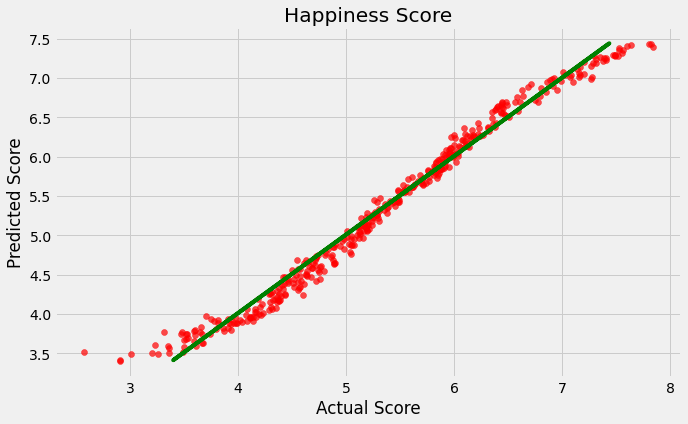

In [ ]:
plt.style.use(style = 'fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(y_test, y_pred, alpha = 0.7, color = 'r')
m, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred, (m * y_pred + b), color = 'g')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Happiness Score')